Dot Product in Numpy

np.dot(a, b) where the first argument is the row and the second argument is the column of the resultant matrix. 
note that the row of arg1 must be the same value as the column of arg2.

Neuron Example with Single Input Example:

In [60]:
import numpy as np
a = [1, 2, 3]
b = [[4, 5, 6], [7, 8, 9], [10, 11, 12]]

dotab = np.dot(np.array(a), np.array(b))
print(dotab)

[48. 54. 60.]


Given a matrix x = [x1, x2, x3] and w = [w1, w2, w3] we can see how dot product is used on a neuron level.
Neuron formula: output = w1x1 + w2x2+ w3x3 + b where the first 3 terms are just the np.dot(x, w). 


Layer of Neuron with Single Input Example:

In [61]:
x = [1, 2, 3, 4]
w = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases = [2, 3, 4]

dot = np.dot(np.array(w), np.array(x)) + biases
print(dot)

[ 32.  73. 114.]


We do np.dot(w,x) so that each weight sub array is paired with an element in the input array to represent the behaviour of a layer.
Recall layer: 
Neuron 1: (w11, w21, w31, w41) * dot (x1, x2, x3, x4)
Neuron 2: (w12, w22, w32, w42) * dot (x1, x2, x3, x4)
Neuron 3: (w13, w23, w33, w43) * dot (x1, x2, x3, x4)

Layer of Neurons with Batch of Inputs Example:

In [62]:
inputs = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
weights = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases = [2, 3, 4]

outputs = np.dot(np.array(inputs), np.array(weights).T) + biases
print(outputs)

[[ 32.  73. 114.]
 [ 72. 177. 282.]
 [112. 281. 450.]]


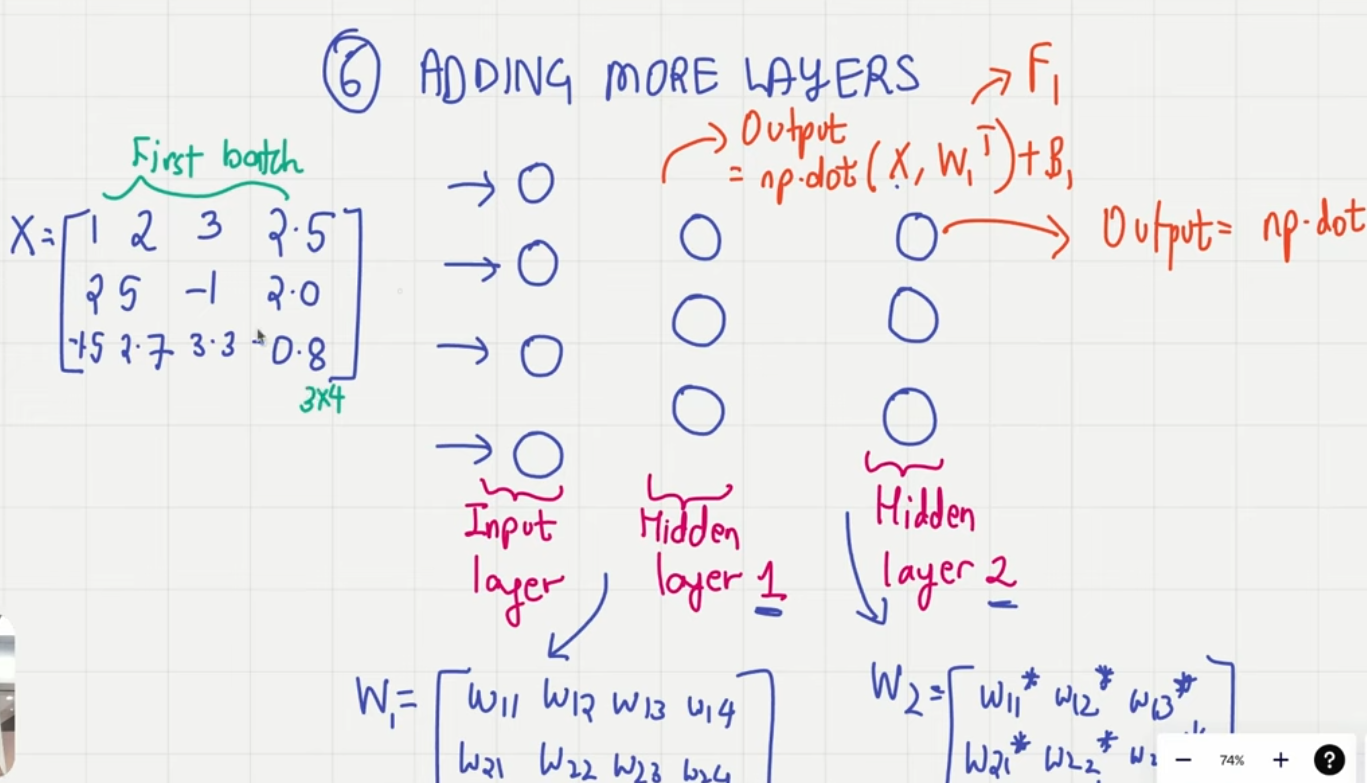

Multiple Layers with Batch of Inputs Example:

In [63]:
#Input layer
inputs = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
inputs_arr = np.array(inputs)

#First hidden layer
weights1 = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases1 = [2, 3, 4]
weights1_arr = np.array(weights1)
biases1_arr = np.array(biases1)

#Second hidden layer
weights2 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases2 = [2, 3, 4]
weights2_arr = np.array(weights2)
biases2_arr = np.array(biases2)

outputs_1 = np.dot(inputs_arr, weights1_arr.T) + biases1_arr

outputs_2 = np.dot(outputs_1, weights2_arr.T) + biases2_arr

print(outputs_2)




[[ 522. 1399. 2276.]
 [1274. 3399. 5524.]
 [2026. 5399. 8772.]]


Practice with 4 Layers:

In [64]:
#Input layer
inputs = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
inputs_arr = np.array(inputs)

#First hidden layer
weights1 = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
biases1 = [2, 3, 4]
weights1_arr = np.array(weights1)
biases1_arr = np.array(biases1)

#NOTE: Output will be 3x4 when np.dot(x,w) is performed due to ~np.dot(rows x, cols weights1) 
outputs_1 = np.dot(inputs_arr, weights1_arr.T) + biases1_arr

#Second hidden layer
weights2 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases2 = [2, 3, 4]
weights2_arr = np.array(weights2)
biases2_arr = np.array(biases2)

#NOTE: Output will be 3x3 when np.dot(x,w) is performed due to ~np.dot(rows Output1, cols weights2)
outputs_2 = np.dot(outputs_1, weights2_arr.T) + biases2_arr

#Third hidden layer
weights3 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases3 = [2, 3, 4]
weights3_arr = np.array(weights2)
biases3_arr = np.array(biases2)

#NOTE: Output will be 3x3 when np.dot(x,w) is performed due to ~np.dot(rows Output2, cols weights3)
outputs_3 = np.dot(outputs_2, weights3_arr.T) + biases3_arr

#Fourth hidden layer
weights4 = [[1, 2, 3], [5, 6, 7], [9, 10, 11]]
biases4 = [2, 3, 4]
weights4_arr = np.array(weights2)
biases4_arr = np.array(biases2)

#NOTE: Output will be 3x3 when np.dot(x,w) is performed due to ~np.dot(rows Output3, cols weights4)
outputs_4 = np.dot(outputs_3, weights4_arr.T) + biases4_arr
print(outputs_4)


[[ 195214.  518483.  841752.]
 [ 474190. 1259411. 2044632.]
 [ 753166. 2000339. 3247512.]]


Representing Layers as Classes:

Dense Layer Class:
Specifications: 
1. given number of layers and neurons it should create an output
2. assign random weights and biases to each neuron

In [65]:
from numpy import random as r

class Layer_Dense:
    def __init__(self, inputs, neurons):
        # self.inputs = []
        # for i in range(inputs):
        #     self.inputs.append(0.01 * r.rand())
        # self.neurons = []
        # self.biases = []
        # for i in range(neurons):
        #     weight = []
        #     for j in range(inputs):
        #         weight.append(0.01* r.rand())
        #     self.neurons.append(weight)
        #     self.biases.append(0.01 * r.rand())
        self.weights = 0.01 * r.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) 

Activation Functions:

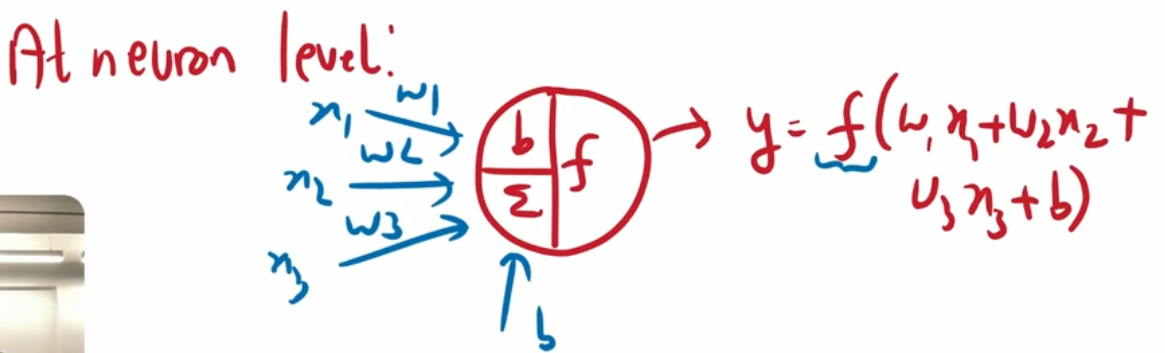

Activation functions basically introduce non-linearity to the neural network, as without them outputs would just be a linear combination of the inputs and weights. This means without activation functions, forward pass would just result in an output that is linearly related to the input. 
This is not ideal as it would limit the NNs ability to represent non-linear relationships which are more common and harder to compute analytically.

In the below graphic, the pink line represents a NN output for the relationship between x and y for a sine function. This NN only has the identity activation function implemented to capture each layer's outputs (y=x). The green line is a neural network with the same number of layers and neurons but with a ReLU activation function instead of an indentity activation function. The blue is the sine function.


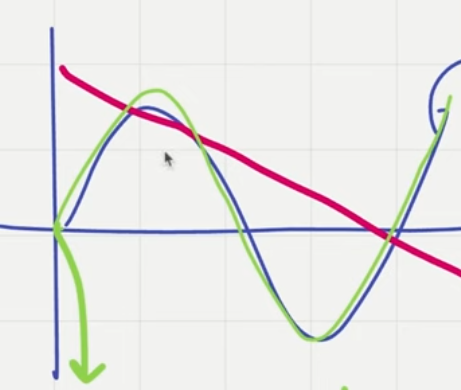

I. Sigmoid Function:

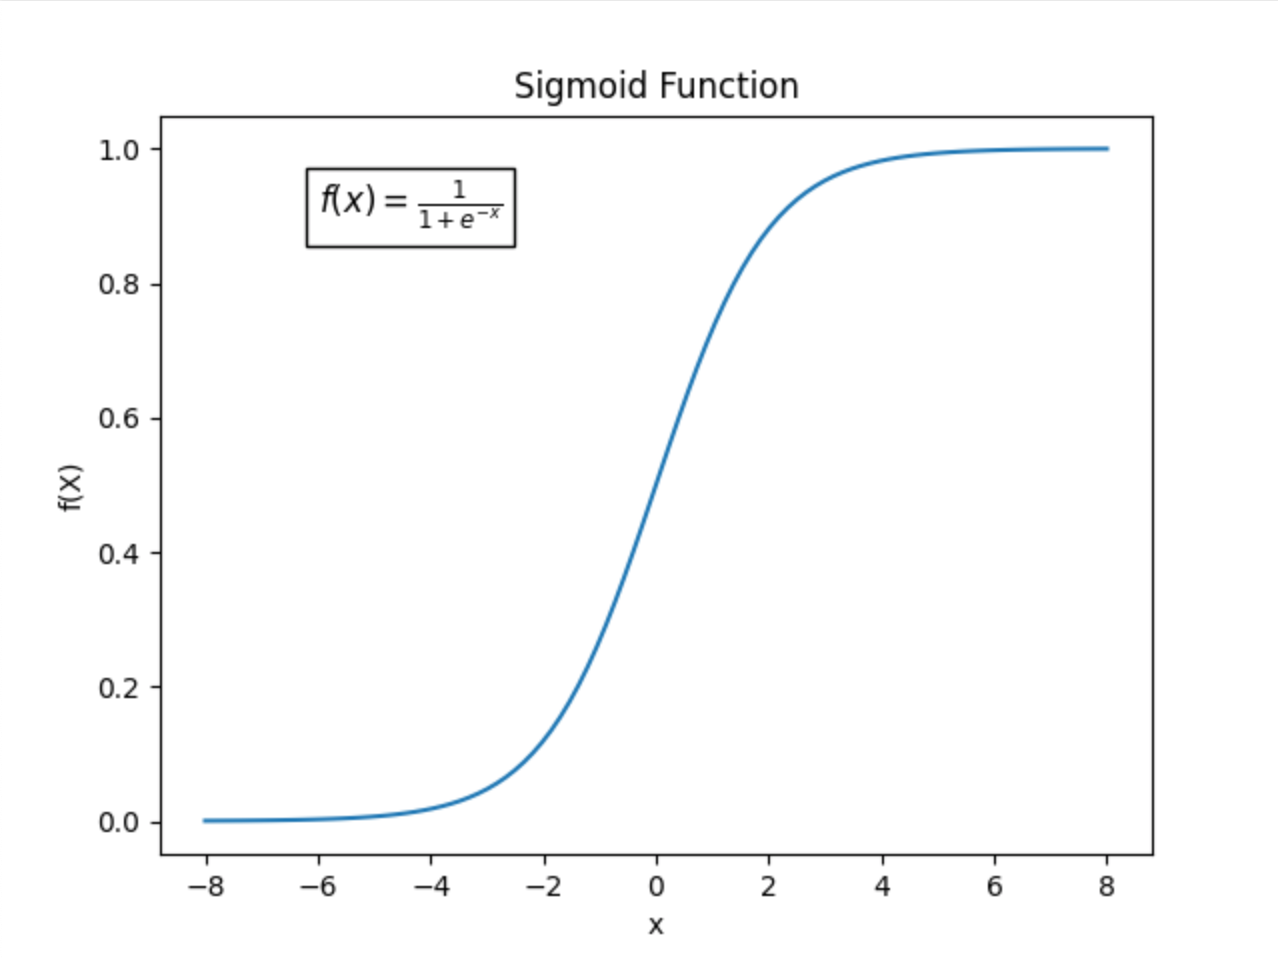

Pros: Good for binary classification due to shape of the function, continuous smooth so can be differentiable for all x (this is useful for gradient descent where we differentiate the activation functions to calculate the loss function)

Cons: The derivative at the ends approaches 0 due to the end behaviour. This means gradient descent for high and low x values is 0. This is known as the vanishing gradient problem.

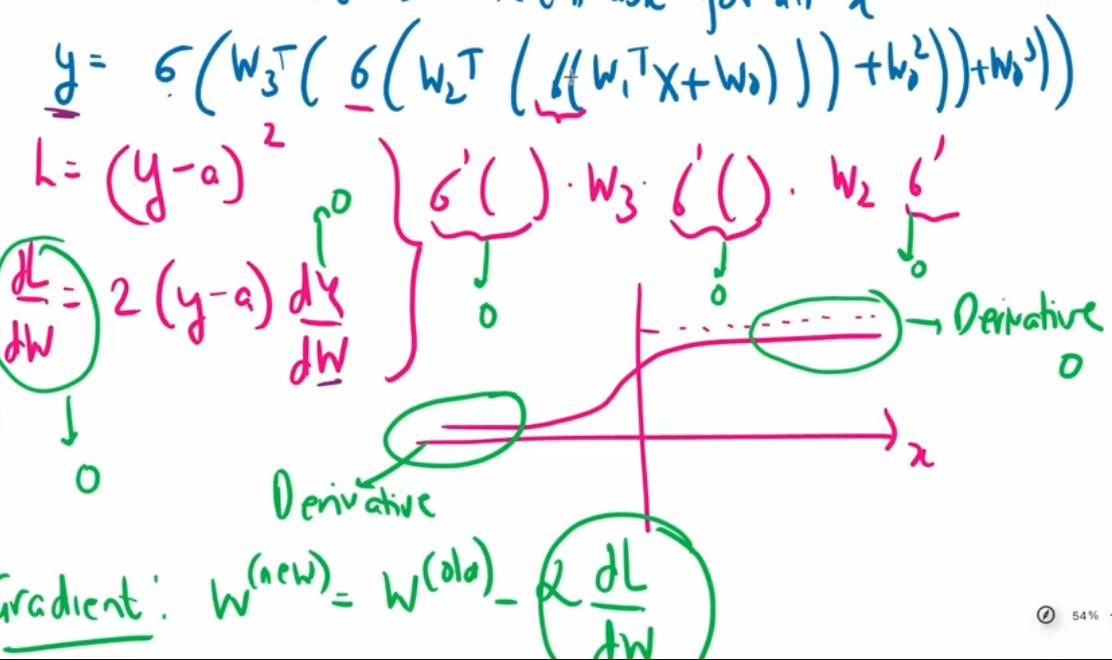

As seen above, when we perform gradient descent on the sigmas (activation functions) in the functionality representation (blue) if the x value you take the derivative at is too extreme, you will end up with the Loss function output as 0.

Block representation of a neural network vs a function representation of a neural network:
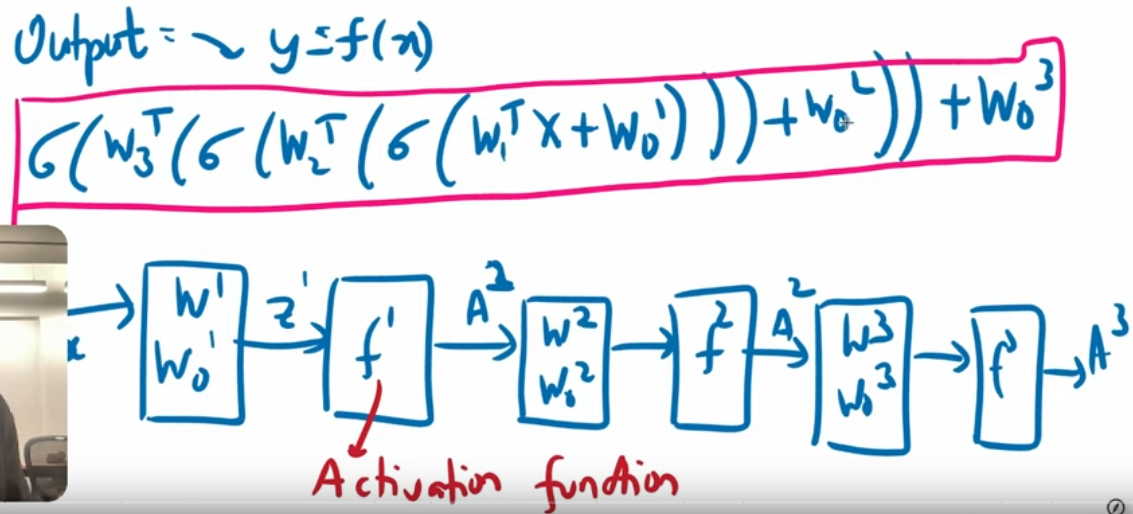

All neural networks are just functions (long functions)!

II. Tanh(x): y = 2 / (1 + e^-2x) - 1

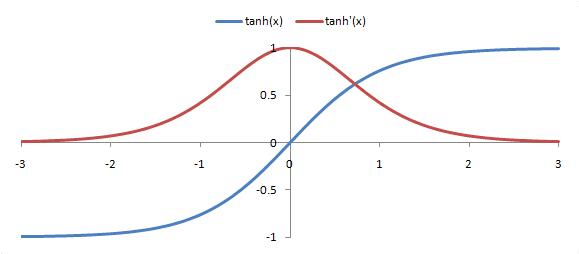
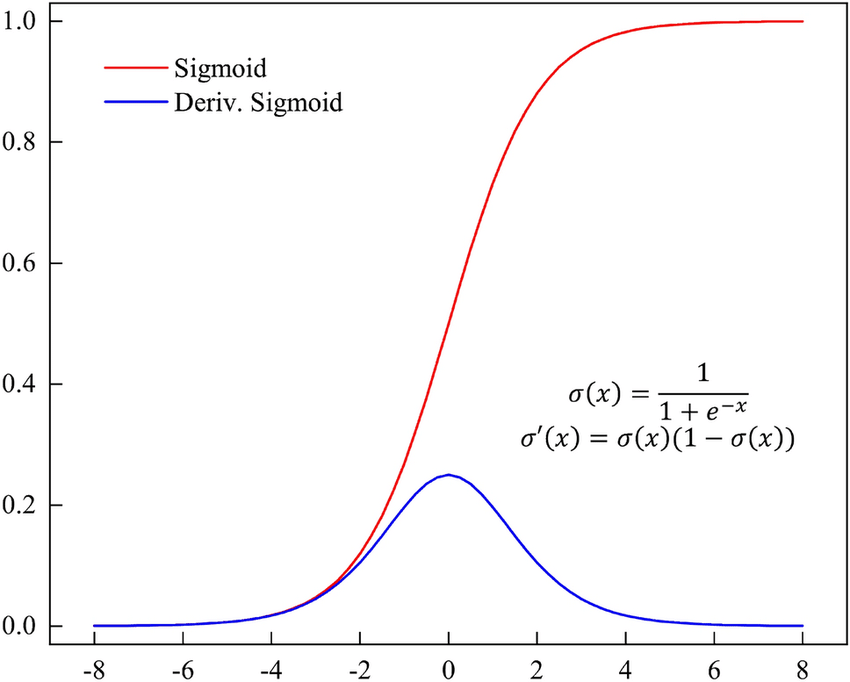

Pros: 
1. more extreme behavior resulting in higher variation in derivatives than sigmoid
The variation in derivatives results in faster computation time since the back prop. can make adjustments faster with more sensitive activation function derivatives. This is why tanh is preferred to sidmoids these days. The only exception is in the final layer for binary classification which uses sigmoid since the range of 0 to 1 can be mapped to probabilities whereas (-1 -> 1) for tanh cannot be mapped to probabilities

2. Centered on 0 and can take negative more effectively since it will map them to negative outputs unlike sigmoid which will just associate most negative values with 0.

Cons: Vanishing gradient problem

III. ReLU - Rectified Linear Unit

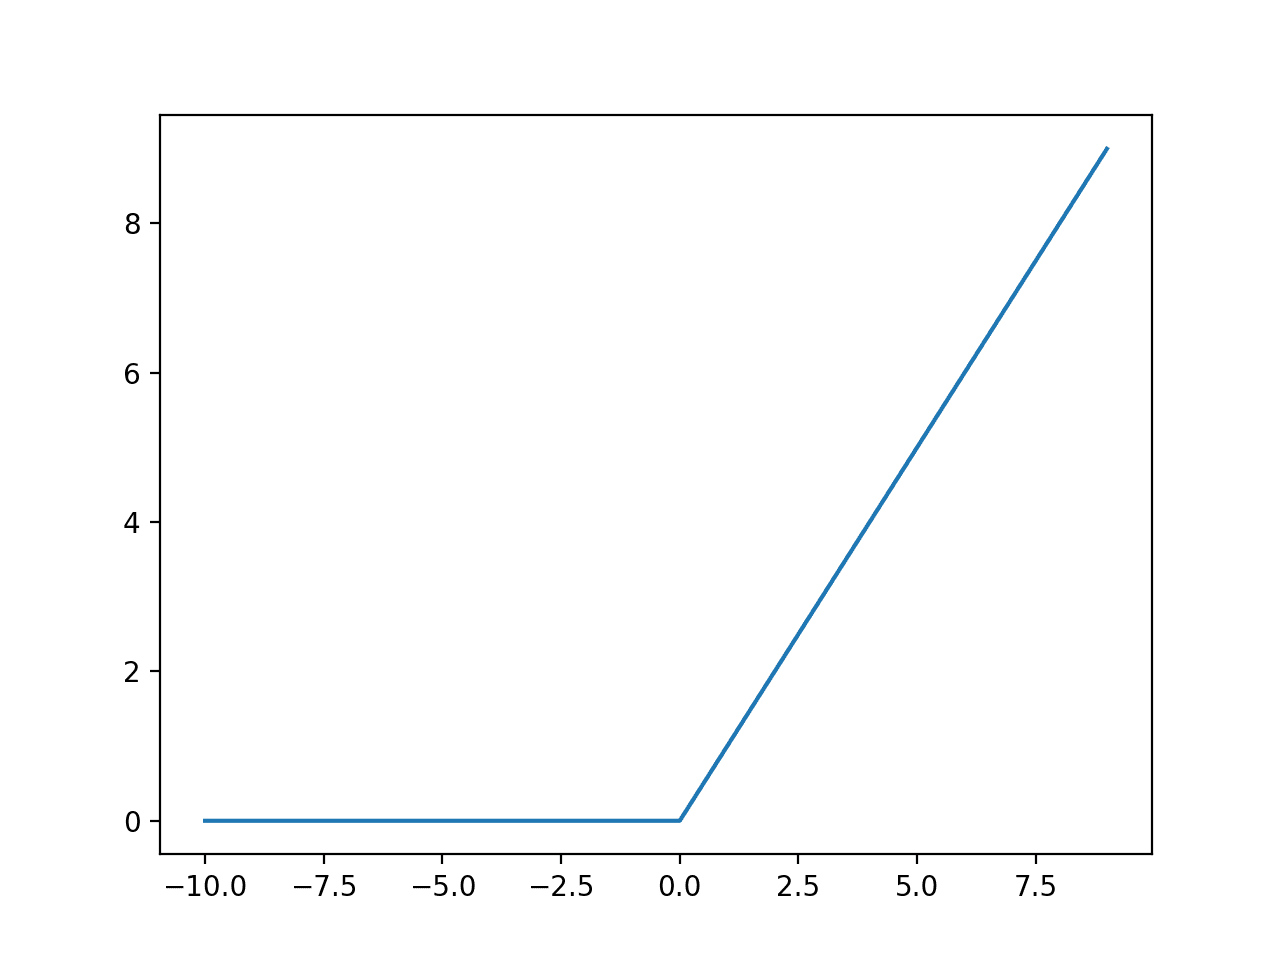

Pros: 

1. Solves vanishing gradient problem for all positive x which means loss function wont get stuck as much

2. Generally has faster training since the function is more simple than Sigmoid and Tanh.

3. Output is also not in a specific range which is a unique trait to ReLU compared to Sigmoid and Tanh.

Cons:

1. Cannot handle negative inputs. Negative inputs will result in no changes to the loss function, so the weights cant update in back propagation. In addition, the output is also 0 so the neuron is doing nothing. This is called the dead neuron problem.

Side note: Even if some neurons end up dead, with large NNs its fine since as long as the majority of the neurons are functional the NN will update. Therefore this con is not that bad considering the pros.

IV. Leaky ReLU

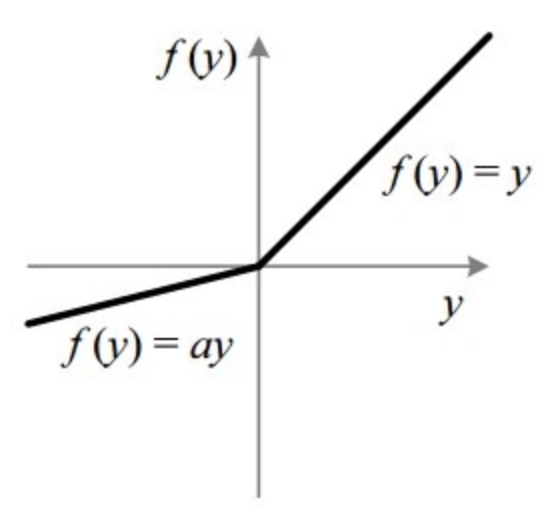

Solves the dead neuron problem while still keeping the benefits of ReLU

V. Softmax

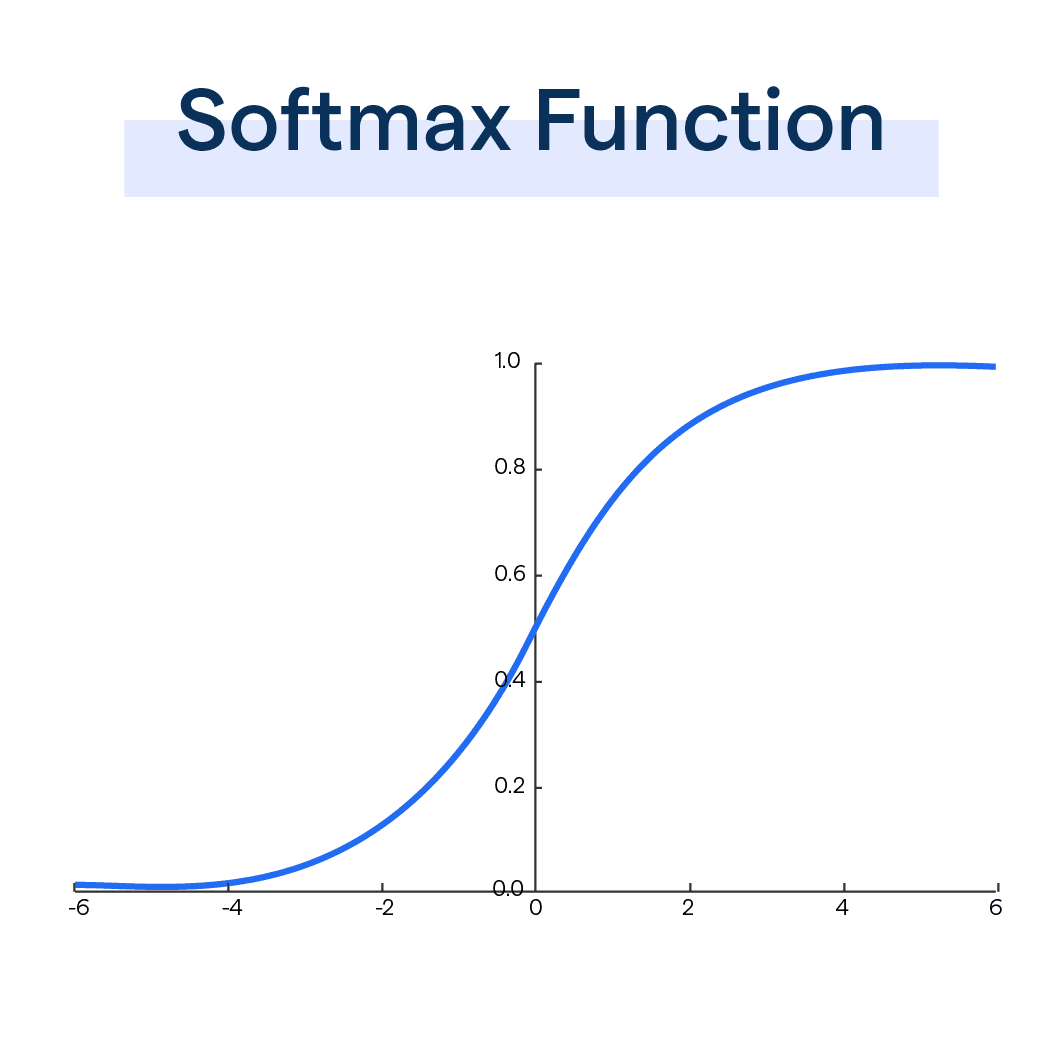
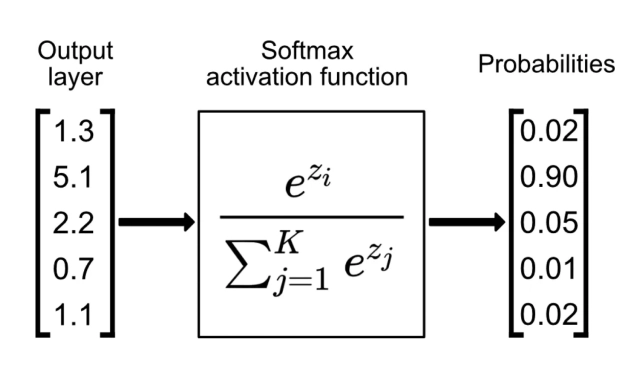

Maps outputs to probabilities by normalizing them (in the above img z is an element in the vector).

The advantage of this is when doing multiple classifications and the output of a neuron might contain some value for similarity to different classes. Softmax will just map them to probabilities.

The mapping is adjusted by using e. This ensures that higher values get pushed up in value while low values are further diminished. This can best be seen in how 5.1 and 2.2 tranform to 0.90 and 0.05 where the difference between initial and final is increased by a lot.

This ensures the softmax function is more sensitive to changes which will increase the effectiveness of a single back propagation.

Pros:
1. Very effective at multiple classification as described above.
2. Does not totally discard non max values like the conventional .MAX() function but rather discourages and encourages the model on certain values.

Cons:
1. Most computationally intensive method thus far due to summation method and having to repeat this function for all elements in the output. This can be fine for smaller outputs but grows "exponentially" with greater outputs.

VI. Swish: y(x) = x*Sigmoid(x)

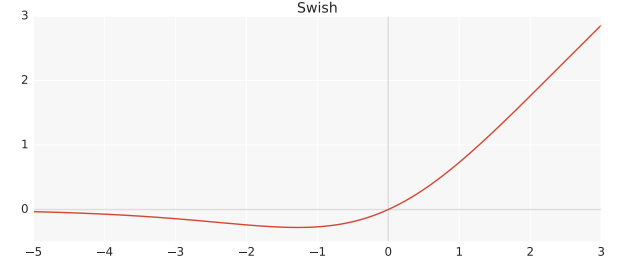

Pros: 
1. Solves vanishing gradient on the positive end
(not used as often as the others tho but this can work sometimes too)



Problem: Non-centered activation functions

Examples: Sigmoid, ReLU - these functions are not centered around x = 0.

This means all the outputs will be positive so the inputs into the next neuron will always be positive.

Since all inputs are positive, and these subset of activation functions are positively sloped,
the gradient will also be positive (ie dL/dWi >0) which matters for back propagation. 

This is known as the zigzag problem:
If gradient in 2 dimensions is always the same sign (either +ve or -ve), we can only move in either the north east or south west direction.

  

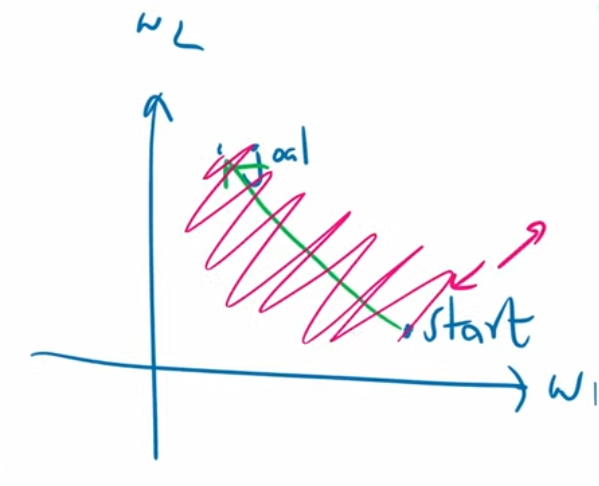
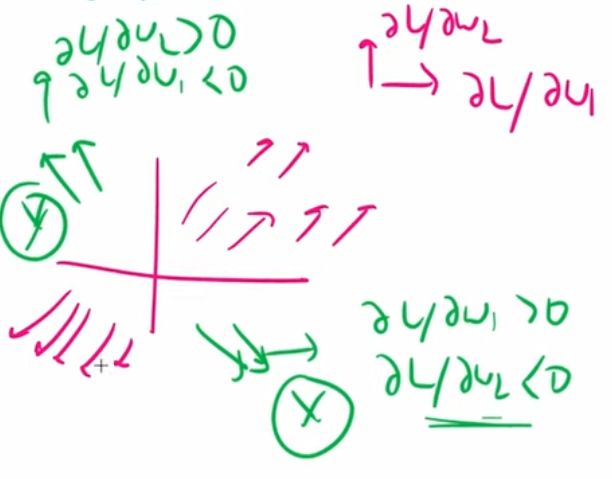

In the first image, we can see the zigzag problem in effect, where the goal lies in a direction not in the southwest or northeast direction while the activation function and inputs are all positive. In this case, since backpropagation only allows for movement in these directions, each pass will result in one zigzag being made which only gets us slightly closer to the end goal. Overall this results in many passes which will reduce the efficiency of the neural network.


In the second image, we can see the pink arrows represent the positive directions while the green represent negative directions. In the event of a only positive activation function, the pink is where we can travel and the green is where we can't.

Choosing activation functions based on use-case:

1. Regression - identity activation function (y=x), or ReLU
2. 2 class classification - combination of tanh for more efficient passes and sigmoid for final layer
3. multiclass classification - softmax

Creating Activation Function Classes:

In [66]:
class Activation_ReLU:

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [67]:
inputs = [[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]]

exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
##Axis = 1 is for doing the max operation on the horizontal of the matrix
##Keepdims ensures the max matrix is not just a 1 x number of rows since we are subtracting 
##same size matrices.

##Keepdims just replicates the max vector such that we have a matrix with
##the same number of cols as the input matrix.

##This subtraction is done to reduce the size of the exponential numbers. It will still ensure
##the probability column matrix output from softmax is still going to be the same.

probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
print(probabilities)
np.sum(probabilities, axis=1)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([1., 1., 1.])

In [68]:
class Activation_Softmax:

    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

First forward pass attempt:

In [69]:
from nnfs.datasets import spiral

spiral_data = spiral.create_data(samples=100, classes=3)

x, y = spiral_data

dense1 = Layer_Dense(2, 3)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)

activation2 = Activation_Softmax()

dense1.forward(x)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.33333385 0.33333296]
 [0.33333352 0.33333424 0.33333224]
 [0.3333333  0.3333352  0.33333158]
 [0.3333337  0.3333352  0.33333114]]


Loss Functions

I. Categorical Cross Entropy Loss:

Compares output with the true value to evaluate effectiveness of the current weights in the NN. Is used for classification problems since the formula considers how close each element (category) is to the truth (as seen in the sigma summation) to evaluate the effectiveness of the NN weights.

Categorical Cross Entropy Loss (CCEL) = -1 * Sigma(True*log(Predicted))
Note: -1 is because classification problems are typically normalized to probabilities so it would be best to use negative log since its positive from 0 to 1 whereas normal log is negative from 0 to 1.

Higher loss means more adjustments need to be made to weights when compared to lower loss

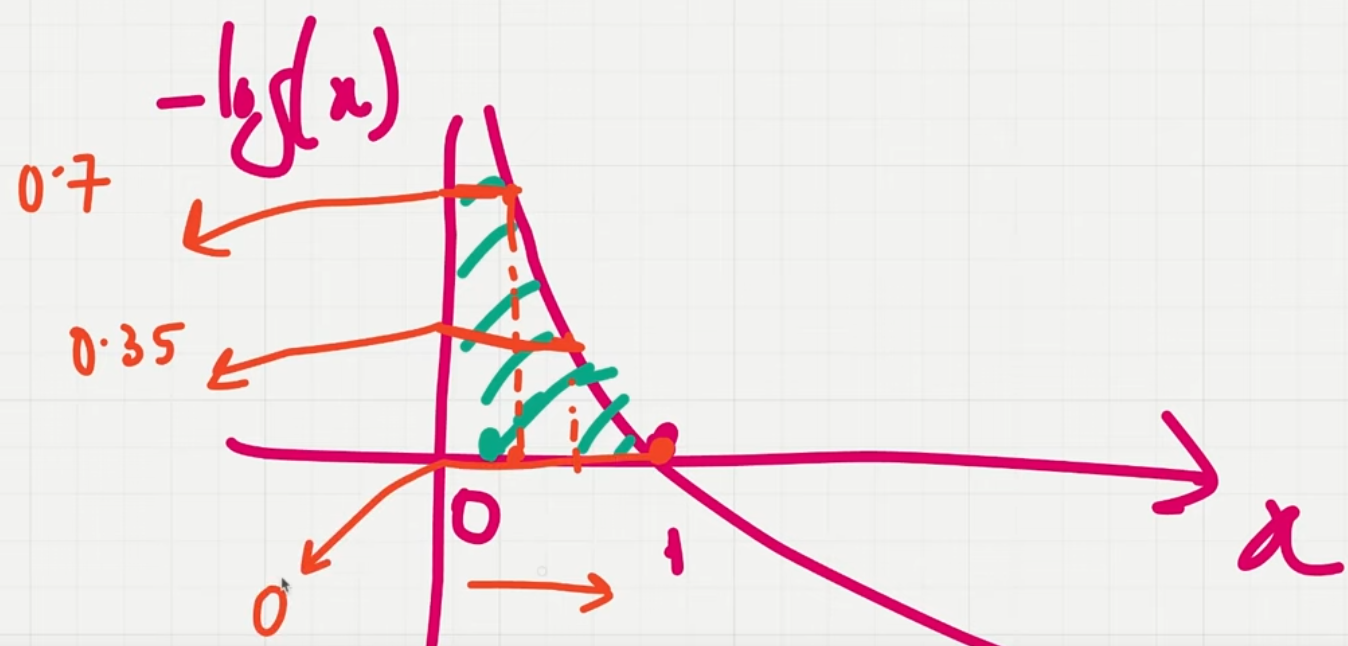

Example in Python Code:

In [70]:
##Case 1: If class targets is a vector

softmax_outputs = np.array([[0.7,0.1,0.2], [0.1,0.5,0.4],[0.02,0.9,0.08]])
class_targets = [0, 1, 1]
# This just makes a vector out of the matrix, where each class target element represents the index of the associated sub array that we take from matrix
# and put in the vector. (ie first element in class_targets is 0 which python must take the 0th element from the first sub array, etc) 
predictions = softmax_outputs[[0,1,2], class_targets]
neg_log = -np.log(predictions)
average_loss = np.mean(neg_log)
print(neg_log)
print(average_loss)

##Case 2: If class targets is a matrix

class_targets = np.array([[1, 0, 0], [0, 1, 0], [0, 1, 0]])
predictions = np.sum(softmax_outputs * class_targets, axis=1)
neg_log = -np.log(predictions)
average_loss = np.mean(neg_log)
print(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804
[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [71]:
from abc import abstractmethod 

class Loss: 

    @abstractmethod
    def forward(self, y_pred, y_true):
        pass

    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [72]:
# This is the child class of Loss, it inherits the calculate method and must implement the abstract method forward defined in the super class.
# Shoutouts to CPS209 for being goated (love OOP)
class Loss_CategorialCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        #For case 1: if target is a vector
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        #For case 2: if target is a matrix of the same shape
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        else:
            raise ValueError("The class targets (y_true) does not match either of the vector or same shape matrix case")
        
        #Apply loss function
        neg_log_likelihoods = -np.log(correct_confidences)
        return neg_log_likelihoods

In [73]:
softmax_outputs = np.array([[0.7,0.1,0.2], [0.1,0.5,0.4],[0.02,0.9,0.08]])
class_targets = np.array([[1, 0, 0], [0, 1, 0], [0, 1, 0]])

loss_function = Loss_CategorialCrossEntropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


Creating a forward pass with a loss function at the end

In [82]:
from nnfs.datasets import spiral

spiral_data = spiral.create_data(samples=100, classes=3)

x, y = spiral_data

dense1 = Layer_Dense(2, 3)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)

activation2 = Activation_Softmax()

dense1.forward(x)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

print(activation2.output[:5])

loss = Loss_CategorialCrossEntropy()
loss = loss_function.calculate(activation2.output, y)

print(loss)

# Implementing accuracy, this metric is used to determine how close the predicted values for a given pass is to the truth value. 1.0 is max 0.0 is min.
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
# Predictions == y is a boolean statement which either be represented as true/false or 0/1. in this case, we take 0/1 and do the mean of all 0/1s.
accuracy = np.mean(predictions == y)
print(accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.3333333  0.3333336  0.33333316]
 [0.33333263 0.3333335  0.33333388]
 [0.33333242 0.3333337  0.33333385]
 [0.33333272 0.33333418 0.33333308]]
1.0986068
0.36333333333333334


II. Mean Squared Error (MSE): 

Loss = (predicted - target)^2

Typically used for regression tasks, whereas Categorical Cross Entropy is used for classification.

Backpropagation

Used to update weights and biases. One example of a back propagation technique is gradient descent, which measures the accuracy of the model predictions through the gradient of the loss function. 

In the diagram below, we can see the loss function accepts an input, the output of the ReLU node. This implies the loss function output is dependant on the outcome of the ReLU operation. This can further be extended to say that all other nodes are dependant on the output of previous nodes.

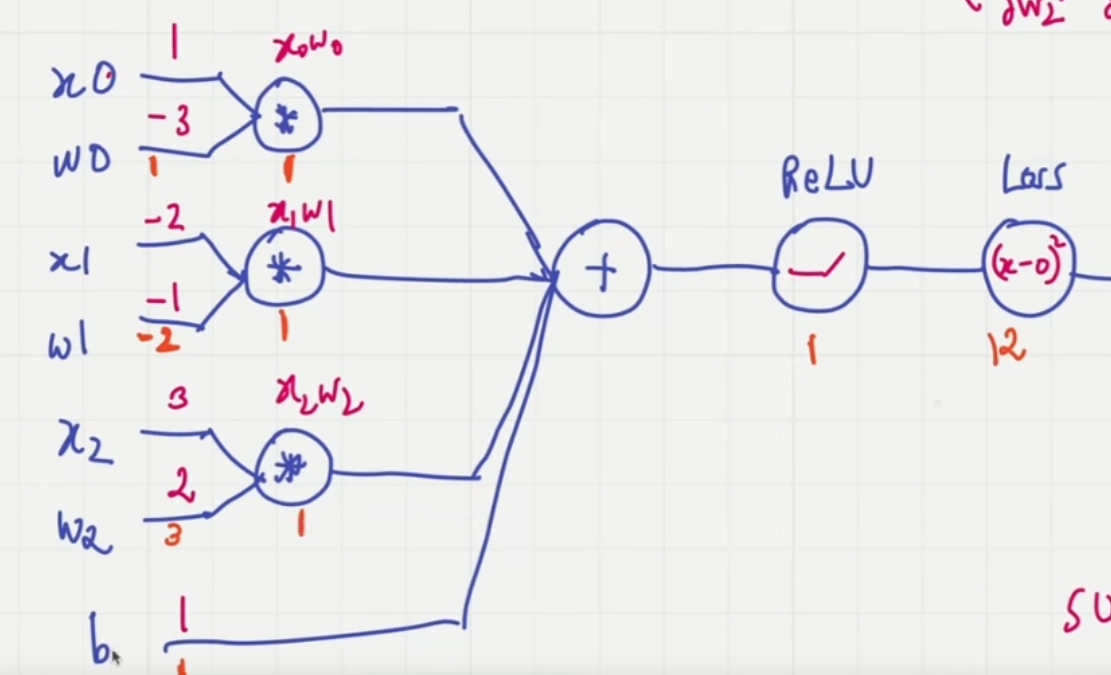

Our goal is to update weights and biases based on the slope of the loss function at a given point. There are many techniques to go about this.

I. Gradient Descent

Assumes the negative slopes always point towards a global minima. Works best for convex functions with single global minima and no local minima such as MSE. In general the effectiveness of gradient descent decreases significantly when we have multiple local minima, flat regions, or highly unstable gradients.

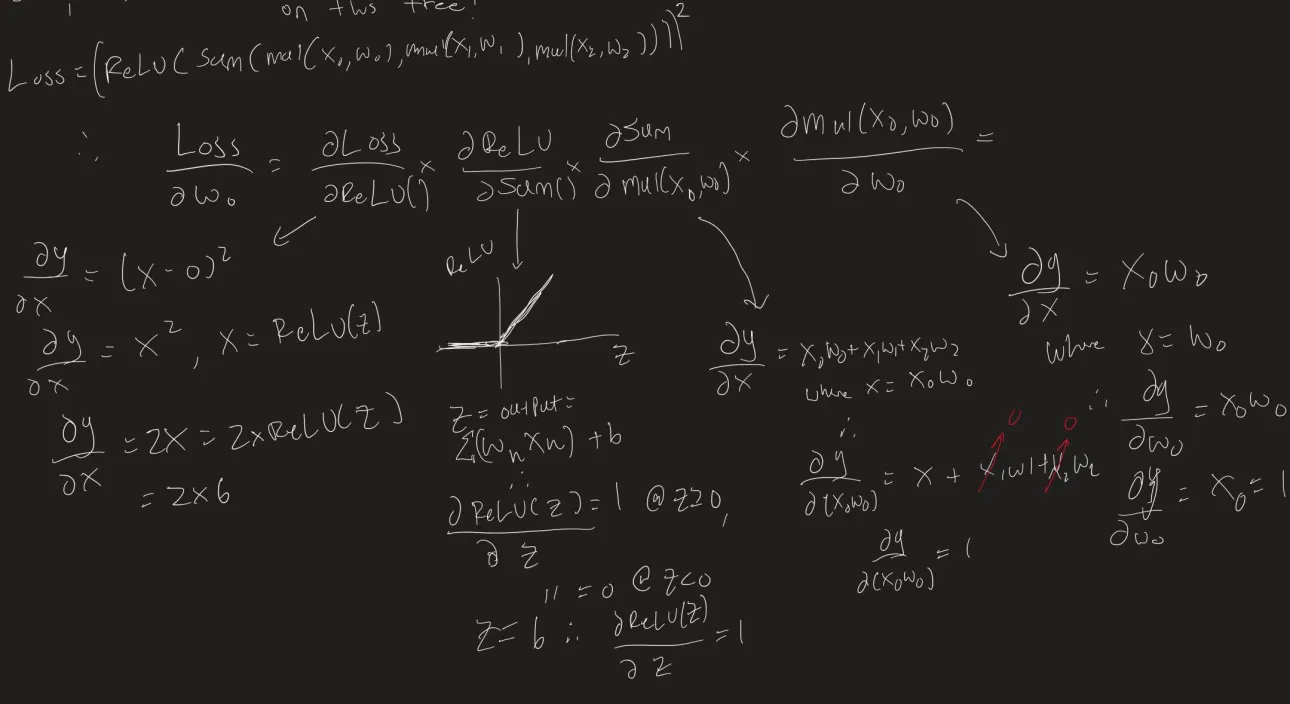

Chain rule is used to relate the gradient of loss with respect to weights since all values are interconnected in the neural network (can be seen in the diagram and expression).